<a href="https://colab.research.google.com/github/divs1234/fakeReviewDetection/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

import pandas as pd
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
neg_deceptive_folder_path = 'drive/My Drive/op_spam_v1.4/negative_polarity/deceptive_from_MTurk/'
neg_true_folder_path = 'drive/My Drive/op_spam_v1.4/negative_polarity/truthful_from_Web/'
pos_deceptive_folder_path = 'drive/My Drive/op_spam_v1.4/positive_polarity/deceptive_from_MTurk/'
pos_true_folder_path = 'drive/My Drive/op_spam_v1.4/positive_polarity/truthful_from_TripAdvisor/'
print(neg_deceptive_folder_path)

drive/My Drive/op_spam_v1.4/negative_polarity/deceptive_from_MTurk/


In [0]:
polarity_class = []
reviews = []
spamity_class =[]
for i in range(1,6):
    insideptru = pos_true_folder_path + 'fold' + str(i) 
    insidepdec = pos_deceptive_folder_path + 'fold' + str(i)
    insidentru = neg_true_folder_path + 'fold' + str(i) 
    insidendec = neg_deceptive_folder_path + 'fold' + str(i) 
    pos_list = []
    for data_file in sorted(os.listdir(insidendec)):
        polarity_class.append('negative')
        spamity_class.append(str(data_file.split('_')[0]))
        with open(os.path.join(insidendec, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
    for data_file in sorted(os.listdir(insidentru)):
        polarity_class.append('negative')
        spamity_class.append(str(data_file.split('_')[0]))
        with open(os.path.join(insidentru, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
    for data_file in sorted(os.listdir(insidepdec)):
        polarity_class.append('positive')
        spamity_class.append(str(data_file.split('_')[0]))
        with open(os.path.join(insidepdec, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
    for data_file in sorted(os.listdir(insideptru)):
        polarity_class.append('positive')
        spamity_class.append(str(data_file.split('_')[0]))
        with open(os.path.join(insideptru, data_file)) as f:
                contents = f.read()
                reviews.append(contents)
# print(reviews)

In [0]:
data_fm = pd.DataFrame({'polarity_class':polarity_class,'review':reviews,'spamity_class':spamity_class})

data_fm.loc[data_fm['spamity_class']=='d','spamity_class']=0
data_fm.loc[data_fm['spamity_class']=='t','spamity_class']=1
print(data_fm)

     polarity_class  ... spamity_class
0          negative  ...             0
1          negative  ...             0
2          negative  ...             0
3          negative  ...             0
4          negative  ...             0
...             ...  ...           ...
1595       positive  ...             1
1596       positive  ...             1
1597       positive  ...             1
1598       positive  ...             1
1599       positive  ...             1

[1600 rows x 3 columns]


In [0]:
data_x = data_fm['review']

data_y = np.asarray(data_fm['spamity_class'],dtype=int)

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
print(X_train)
print(y_train)

1157    The entrance and room was spacious and modern,...
703     I had never been to Chicago and was looking fo...
144     I was surprised by the fact that there were no...
678     The Fairmont Chicago Millennium Park Hotel was...
313     I arrived at the Sofitel for a joint leisure a...
                              ...                        
1304    The Amalfi Hotel in Chicago advertises itself ...
265     We needed an extra night in Chicago after a gr...
1310    The service was only subpar and then rooms nee...
1479    The Amalfi Hotel Chicago is perfect for a roma...
1096    My wife and I stayed here for a weekend in Chi...
Name: review, Length: 1280, dtype: object
[0 0 1 ... 0 0 1]


In [0]:
cv1 =  CountVectorizer(max_df=0.50,min_df=0.01,stop_words=["all","in","the","is","and","this","south","hotel"])

X_traincv = cv1.fit_transform(X_train)
X_testcv = cv1.transform(X_test)
print(X_testcv)

  (0, 34)	1
  (0, 77)	1
  (0, 81)	2
  (0, 111)	1
  (0, 113)	1
  (0, 142)	1
  (0, 166)	1
  (0, 169)	1
  (0, 184)	1
  (0, 204)	1
  (0, 224)	1
  (0, 282)	1
  (0, 294)	1
  (0, 355)	1
  (0, 378)	1
  (0, 423)	1
  (0, 431)	1
  (0, 433)	1
  (0, 453)	1
  (0, 460)	1
  (0, 480)	1
  (0, 489)	1
  (0, 510)	1
  (0, 570)	1
  (0, 581)	1
  :	:
  (319, 975)	1
  (319, 986)	1
  (319, 1030)	2
  (319, 1032)	1
  (319, 1034)	1
  (319, 1046)	1
  (319, 1050)	4
  (319, 1052)	1
  (319, 1064)	1
  (319, 1068)	2
  (319, 1072)	2
  (319, 1079)	2
  (319, 1095)	1
  (319, 1106)	1
  (319, 1116)	1
  (319, 1124)	1
  (319, 1129)	1
  (319, 1137)	1
  (319, 1151)	1
  (319, 1163)	1
  (319, 1164)	1
  (319, 1169)	1
  (319, 1172)	2
  (319, 1185)	1
  (319, 1194)	1


In [0]:
nbayes = MultinomialNB()

nbayes.fit(X_traincv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_predictions = nbayes.predict(X_testcv)

In [0]:
y_result = list(y_predictions)

yp=["True" if a==1 else "Deceptive" for a in y_result]
X_testlist = list(X_test)

output_fm = pd.DataFrame({'Review':X_testlist ,'True(1)/Deceptive(0)':yp})
output_fm

,Review,True(1)/Deceptive(0)
0,We recently completed our second stay at the F...,True
1,Hyatt Regency Chicago seemed like a nice place...,Deceptive
2,The service from check-in to checkout was exce...,True
3,Not a good start when the front desk isn't wil...,True
4,Luxury and comfort combine to give a wonderful...,Deceptive
...,...,...
315,"On our visit to Chicago, we chose the Hyatt du...",True
316,The atmosphere at the Talbott Hotel is very we...,Deceptive
317,It is always interesting going to a high quali...,True
318,This hotel was incredible! Haven't had a bette...,Deceptive


In [0]:
print("Accuracy % :",metrics.accuracy_score(y_test, y_predictions)*100)
print("Precision Score: ", precision_score(y_test, y_predictions, average='micro'))
print("Recall Score: ",recall_score(y_test, y_predictions, average='micro') )
print("F1 Score: ",f1_score(y_test, y_predictions, average='micro') )

Accuracy % : 88.4375
Precision Score:  0.884375
Recall Score:  0.884375
F1 Score:  0.8843749999999999


In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

clf.fit(X_traincv, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predictions = clf.predict(X_testcv)

In [0]:
y_result = list(y_predictions)

yp=["True" if a==1 else "Deceptive" for a in y_result]
X_testlist = list(X_test)

output_fm = pd.DataFrame({'Review':X_testlist ,'True(1)/Deceptive(0)':yp})
output_fm

,Review,True(1)/Deceptive(0)
0,"We stayed in the Amalfi in July 2010, 4th of J...",Deceptive
1,Stays here while on a business trip in Chicago...,Deceptive
2,"The reviews we read were a bit mixed, but I th...",True
3,A bunch of us got together and we had a great ...,True
4,If you are ever going to visit Chicago and nee...,Deceptive
...,...,...
315,I stayed at the Millennium Knickerbocker Hotel...,True
316,My stay at the Hotel Monaco Chicago was amazin...,Deceptive
317,Very beautiful hotel with a wonderful view. Th...,True
318,This hotel was wonderful. My room was clean an...,Deceptive


In [0]:
print("Accuracy % :",metrics.accuracy_score(y_test, y_predictions)*100)
print("Precision Score: ", precision_score(y_test, y_predictions, average='micro'))
print("Recall Score: ",recall_score(y_test, y_predictions, average='micro') )
print("F1 Score: ",f1_score(y_test, y_predictions, average='micro') )

Accuracy % : 80.3125
Precision Score:  0.803125
Recall Score:  0.803125
F1 Score:  0.803125


In [0]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(data_x, data_y, test_size=0.2)
cv1 =  CountVectorizer(max_df=0.50,min_df=0.01,stop_words=["all","in","the","is","and","this","south","hotel"])

X_traincv = cv1.fit_transform(X_trainS)
X_testcv=cv1.transform(X_testS)
nbayes = MultinomialNB()
nbayes.fit(X_traincv, y_trainS)

while 1==1:
 

    y_CurrPredictions = nbayes.predict(X_testcv)
    y_CurrResult = list(y_CurrPredictions)
    yc=y_CurrResult.copy()
    yc.sort()
    yt=list(y_testS)
    ytc=yt.copy()
    ytc.sort()

    if ytc==yc:
        f=1;
        #print('bye')
        break;
    else:
        odf=pd.DataFrame({'X':X_trainS,'Y':y_trainS})
        od=pd.DataFrame({'X':X_testS,'Y':y_testS})
        df_all_rows = pd.concat([odf, od])
        data_x=df_all_rows['X']
        data_y=df_all_rows['Y']
        X_trainS, X_testS, y_trainS, y_testS = train_test_split(data_x, data_y, test_size=0.25)
        cv1 =  CountVectorizer(max_df=0.50,min_df=0.01,stop_words=["all","in","the","is","and","this","south","hotel"])

        X_traincv = cv1.fit_transform(X_trainS)
        X_testcv=cv1.transform(X_testS)
        nbayes = MultinomialNB()
        nbayes.fit(X_traincv, y_trainS)
        print('hi')
    




hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [0]:

print("Accuracy % :",metrics.accuracy_score(y_testS, y_CurrPredictions)*100)
print("Precision Score: ", precision_score(y_testS,  y_CurrPredictions, average='micro'))
print("Recall Score: ",recall_score(y_testS,y_CurrPredictions, average='micro') )
print("F1 Score: ",f1_score(y_testS,y_CurrPredictions, average='micro') )
  

Accuracy % : 87.0
Precision Score:  0.87
Recall Score:  0.87
F1 Score:  0.87


In [0]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(data_x, data_y, test_size=0.2)
cv1 =  CountVectorizer(max_df=0.40,min_df=0.01,stop_words=["all","in","the","is","and","this","south","hotel"])

X_traincv = cv1.fit_transform(X_trainS)
X_testcv=cv1.transform(X_testS)
clf = SVC(gamma='auto')

clf.fit(X_traincv, y_trainS)

while 1==1:
 

    y_CurrPredictions =  clf.predict(X_testcv)
    y_CurrResult = list(y_CurrPredictions)
    yc=y_CurrResult.copy()
    yc.sort()
    yt=list(y_testS)
    ytc=yt.copy()
    ytc.sort()

    if ytc==yc:
        f=1;
        print('bye')
        break;
    else:
        odf=pd.DataFrame({'X':X_trainS,'Y':y_trainS})
        od=pd.DataFrame({'X':X_testS,'Y':y_testS})
        df_all_rows = pd.concat([odf, od])
        data_x=df_all_rows['X']
        data_y=df_all_rows['Y']
        X_trainS, X_testS, y_trainS, y_testS = train_test_split(data_x, data_y, test_size=0.25)
        cv1 =  CountVectorizer(max_df=0.50,min_df=0.01,stop_words=["all","in","the","is","and","this","south","hotel"])

        X_traincv = cv1.fit_transform(X_trainS)
        X_testcv=cv1.transform(X_testS)
        clf = SVC(gamma='auto')

        clf.fit(X_traincv, y_trainS)
        print('hi')

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
h

In [0]:
print("Accuracy % :",metrics.accuracy_score(y_testS, y_CurrPredictions)*100)
print("Precision Score: ", precision_score(y_testS,  y_CurrPredictions, average='micro'))
print("Recall Score: ",recall_score(y_testS,y_CurrPredictions, average='micro') )
print("F1 Score: ",f1_score(y_testS,y_CurrPredictions, average='micro') )

Accuracy % : 80.5
Precision Score:  0.805
Recall Score:  0.805
F1 Score:  0.805


In [0]:
pip install matplotlib

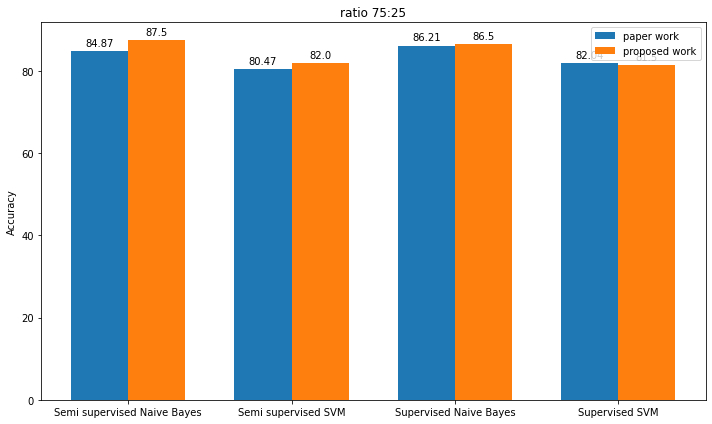

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Semi supervised Naive Bayes', 'Semi supervised SVM', 'Supervised Naive Bayes', 'Supervised SVM']
paper_work = [84.87,80.47,86.21,82.04]
proposed_work = [87.50,82.00,86.50,81.50]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, paper_work, width, label='paper work')
rects2 = ax.bar(x + width/2, proposed_work, width, label='proposed work')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('ratio 75:25')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.rcParams['figure.figsize']={10,6}
plt.savefig('foo.png')
plt.show()


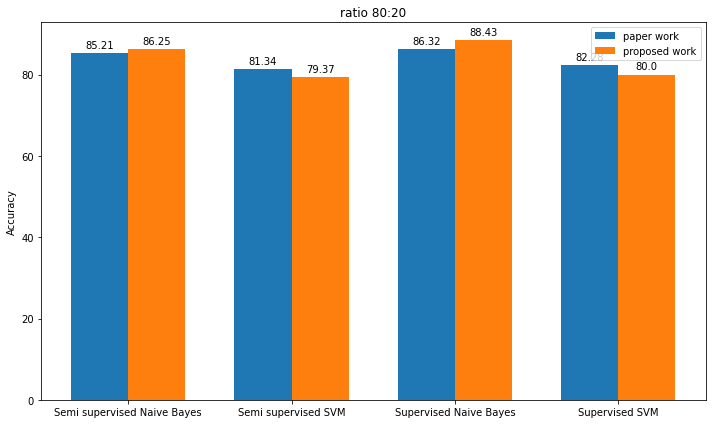

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Semi supervised Naive Bayes', 'Semi supervised SVM', 'Supervised Naive Bayes', 'Supervised SVM']
paper_work = [85.21,81.34,86.32,82.28]
proposed_work = [86.25,79.37,88.43,80.00]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, paper_work, width, label='paper work')
rects2 = ax.bar(x + width/2, proposed_work, width, label='proposed work')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('ratio 80:20')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.rcParams['figure.figsize']={10,6}
plt.savefig('foo1.png')
plt.show()
